# __Data Science Project: Iris Dataset Analysis __

In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np

## 1. Introduction - Dataset Preparation

In [2]:
df = sns.load_dataset("iris")

In [3]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [4]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
df.describe(include = "all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### 1b ) Dataset further breakdown

In [8]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [9]:
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [10]:
df.isnull().values.any()  # nice to see no missing values

False

## 2. Dataset Visualisation

sepal_length       AxesSubplot(0.125,0.125;0.168478x0.755)
sepal_width     AxesSubplot(0.327174,0.125;0.168478x0.755)
petal_length    AxesSubplot(0.529348,0.125;0.168478x0.755)
petal_width     AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

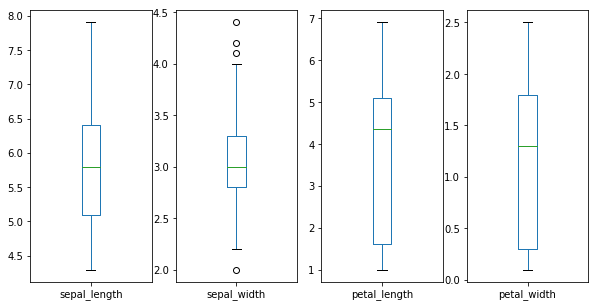

In [11]:
df.plot(kind='box', subplots=True, figsize = (10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17ac9828>,
      dtype=object)

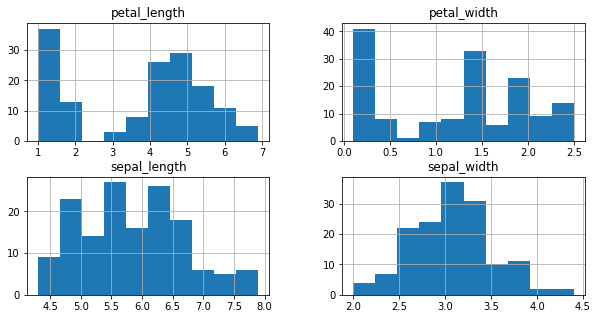

In [12]:
df.hist(figsize=(10,5))

/Users/brandon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


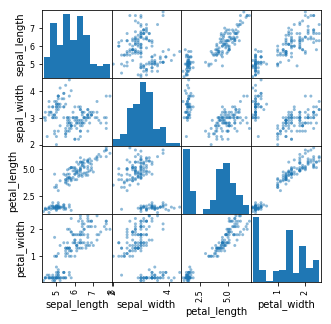

In [13]:
pd.scatter_matrix(df, figsize=(5,5))
plt.show()

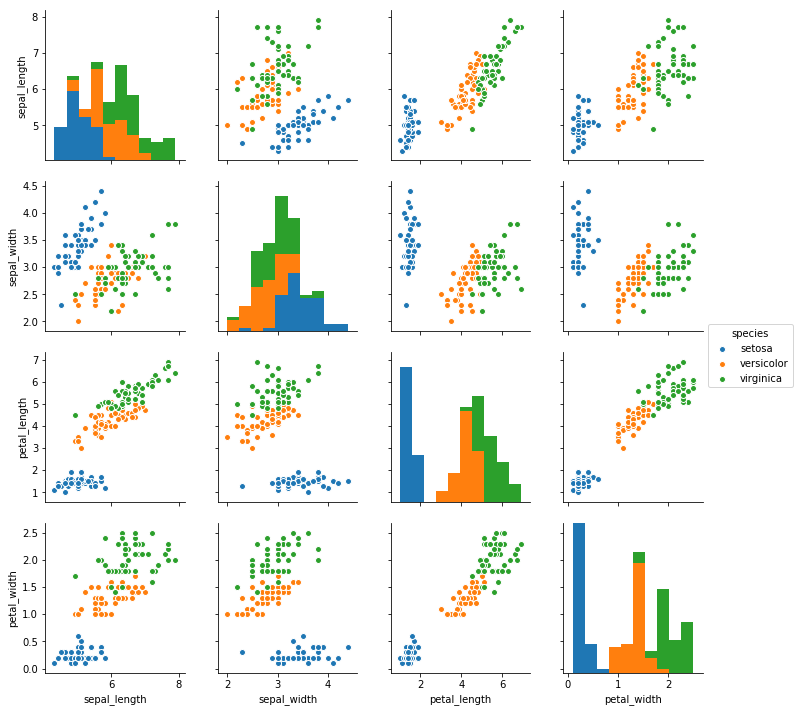

In [14]:
sns.pairplot(df, hue = 'species')

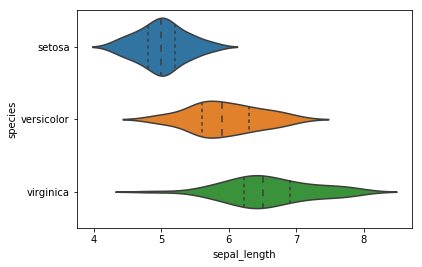

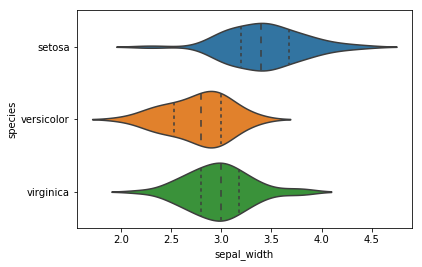

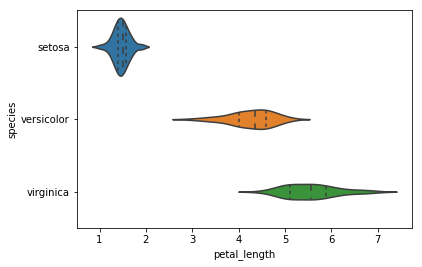

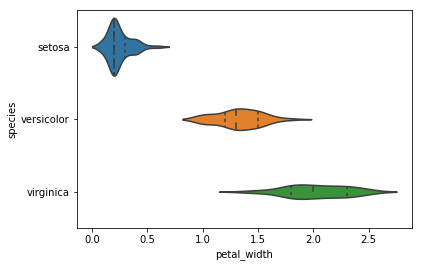

In [15]:
#Use violinplot to check the numerical distribution of of each data column

g = sns.violinplot(y='species', x='sepal_length', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=df, inner='quartile')
plt.show()

## 3. Modeling and Evaluation - Logistical Regression

__Problem: Try to predict the sepal length & sepal width based on the species, petal_length & petal_width__ 

In [16]:
np.array(df)

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [17]:
X=np.array(df.iloc[:,0:4])
Y=np.array(df["species"])

In [18]:
a = X[:,0]
b = X[:,1]
c = X[:,2]
d = X[:,3]

In [19]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import model_selection



In [81]:
#split out dataset

validation_size = 0.3
seed = 800
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [82]:
# Test options and evaluation metric
seed = 800
scoring = 'accuracy'

In [96]:
#Fit model into dataset

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(intercept_scaling = 1)

In [97]:
LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
predictions = LR.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[14  0  0]
 [ 0 13  3]
 [ 0  0 15]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       1.00      0.81      0.90        16
  virginica       0.83      1.00      0.91        15

avg / total       0.94      0.93      0.93        45



We can see that the accuracy is 0.90 or 90%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).